# Initialization

In [ ]:
!pip install shap
!pip install catboost
import shap
import numpy as np
import pandas as pd
from sklearn import metrics
from matplotlib import pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
df_train=pd.read_csv("https://drive.google.com/uc?id=175WM10UC_5S2kT4mmPvSoLbWTs4lkg4S&export=download")
df_test=pd.read_csv("https://drive.google.com/uc?id=1765__PlOXqJOe1054LTbrBv2XP4LQkUV&export=download").iloc[:, 1:]

y=df_train.loc[:,'Y']
X=df_train.drop('Y',axis=1)

#AutoML :  https://supervised.mljar.com/

In [ ]:
!pip install mljar-supervised

In [ ]:
from supervised.automl import AutoML # MLJAR AutoML
automljar = AutoML(eval_metric='auc', mode='Explain')

In [ ]:
automljar.fit(X, y)

Linear algorithm was disabled.
AutoML directory: AutoML_1
The task is binary_classification with evaluation metric auc
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline auc 0.5 trained in 8.96 seconds


/usr/local/lib/python3.10/dist-packages/supervised/utils/shap.py:39: UserWarning: Disable SHAP explanations because of number of columns > 500.


2_DecisionTree auc 0.725 trained in 55.67 seconds
* Step default_algorithms will try to check up to 3 models


/usr/local/lib/python3.10/dist-packages/supervised/utils/shap.py:39: UserWarning: Disable SHAP explanations because of number of columns > 500.


3_Default_Xgboost auc 0.834884 trained in 37.24 seconds
4_Default_NeuralNetwork auc 0.806105 trained in 51.35 seconds


/usr/local/lib/python3.10/dist-packages/supervised/utils/shap.py:39: UserWarning: Disable SHAP explanations because of number of columns > 500.


5_Default_RandomForest auc 0.830814 trained in 88.72 seconds
* Step ensemble will try to check up to 1 model
Ensemble auc 0.834884 trained in 2.27 seconds
AutoML fit time: 261.29 seconds
AutoML best model: 3_Default_Xgboost


AutoML(eval_metric='auc')

In [ ]:
mljar_predict_proba = automljar.predict_proba(df_test)
mljar_predict = automljar.predict(df_test)

In [ ]:
automljar.report()

In [ ]:
df_output1 = pd.DataFrame({"Id": df_test.index,"Predicted": mljar_predict.ravel()})
df_output1.to_csv("1_automljar_submission_predict.csv",index=False)
df_output = pd.DataFrame({"Id": df_test.index,"Predicted": mljar_predict_proba[:,1].ravel()})
df_output.to_csv("2_automljar_submission_predict_proba.csv",index=False)

<Axes: >

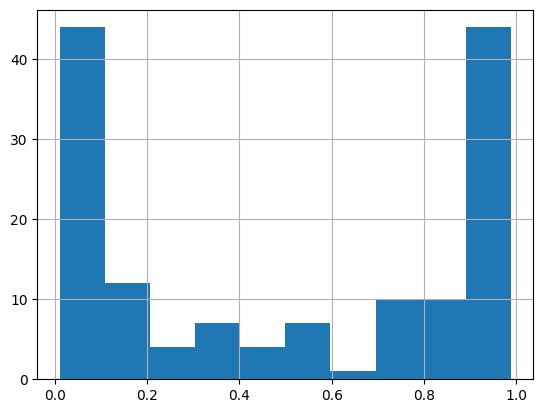

In [ ]:
df_output.Predicted.hist()

# AutoML :   https://auto.gluon.ai/stable/index.html

In [ ]:
!pip install h5py
!pip install typing-extensions
!pip install wheel
!pip install autogluon

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
train_data = TabularDataset(df_train)
test_data = TabularDataset(df_test)

predictor = TabularPredictor(label='Y',eval_metric='roc_auc').fit(train_data=train_data)
predictions = predictor.predict_proba(test_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20230513_115958/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230513_115958/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    332
Train Data Columns: 4720
Label Column: Y
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0.0, 1.0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11365.74 MB
	Train Data (Original)

In [ ]:
df_output = pd.DataFrame({
"Id": df_test.index,
"Predicted": predictions.iloc[:,1].ravel()
})
df_output.to_csv("autogluon_submission_predict_proba.csv",index=False)

### Dealing with Missing Values



In [ ]:
#AutoGluon - fillna with mean
df_train_mean = df_train.fillna(df_train.mean())
predictor = TabularPredictor(label='Y',eval_metric='roc_auc').fit(train_data=df_train_mean)
predictions = predictor.predict_proba(test_data.fillna(test_data.mean()))
df_output = pd.DataFrame({
"Id": df_test["Id"],
"Predicted": predictions.iloc[:,1].ravel()
})
df_output.to_csv("autogluon_submission_mean_predict_proba.csv",index=False)

No path specified. Models will be saved in: "AutogluonModels/ag-20230513_121836/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230513_121836/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    332
Train Data Columns: 4720
Label Column: Y
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0.0, 1.0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10654.66 MB
	Train Data (Original)

In [ ]:
#AutoGluon - fillna with median
df_train_median = df_train.copy().fillna(df_train.median())
predictor = TabularPredictor(label='Y',eval_metric='roc_auc').fit(train_data=df_train_median)
predictions = predictor.predict_proba(test_data.fillna(test_data.median()))
df_output = pd.DataFrame({
"Id": df_test["Id"],
"Predicted": predictions.iloc[:,1].ravel()
})
df_output.to_csv("autogluon_submission_median_predict_proba.csv",index=False)

No path specified. Models will be saved in: "AutogluonModels/ag-20230513_122704/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230513_122704/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    332
Train Data Columns: 4720
Label Column: Y
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0.0, 1.0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10642.98 MB
	Train Data (Original)

# ExtraTrees classifier - Best Score

In [ ]:
X = X.fillna(X.median())

clf = ExtraTreesClassifier(n_estimators=250, random_state=42)
clf.fit(X,y)
cross_val_score(clf, X, y, cv=5, scoring='roc_auc').mean()

0.8867974917239623

In [ ]:
#ExtraTreesClassifier - BEST SUBMISSION
clf = ExtraTreesClassifier(n_estimators=250, random_state=42)
clf.fit(X,y)
predictions = pd.DataFrame(clf.predict_proba(df_test.fillna(X.median())))
df_output = pd.DataFrame({
"Id": df_test.index,
"Predicted": predictions.iloc[:,1].ravel()
})
df_output.to_csv("ExtraTreesClassifier_submission_median_predict_proba.csv",index=False)

### Removing useless columns as defined as such by AUTOgluon

In [ ]:
useless_features = ['F_367', 'F_380', 'F_445', 'F_446', 'F_455', 'F_458', 'F_460', 'F_472', 'F_490', 'F_491', 'F_495', 'F_504', 'F_508', 'F_509', 'F_532', 'F_1373', 'F_1374', 'F_1375', 'F_1376', 'F_1377', 'F_1378', 'F_1379', 'F_1380', 'F_1381', 'F_1382', 'F_1383', 'F_1384', 'F_1385', 'F_1386', 'F_1399', 'F_1400', 'F_1401', 'F_1402', 'F_1403', 'F_1404', 'F_1418', 'F_1420', 'F_1437', 'F_1438', 'F_1439', 'F_1441', 'F_1442', 'F_1443', 'F_1445', 'F_1446', 'F_1453', 'F_1454', 'F_1455', 'F_1456', 'F_1457', 'F_1458', 'F_1459', 'F_1460', 'F_1461', 'F_1462', 'F_1463', 'F_1464', 'F_1465', 'F_1466', 'F_1467', 'F_1469', 'F_1470', 'F_1471', 'F_1472', 'F_1474', 'F_1475', 'F_1476', 'F_1477', 'F_1478', 'F_1479', 'F_1480', 'F_1481', 'F_1482', 'F_1483', 'F_1497', 'F_1499', 'F_1516', 'F_1517', 'F_1518', 'F_1520', 'F_1521', 'F_1522', 'F_1524', 'F_1525', 'F_1532', 'F_1533', 'F_1534', 'F_1535', 'F_1536', 'F_1537', 'F_1538', 'F_1539', 'F_1540', 'F_1541', 'F_1542', 'F_1543', 'F_1544', 'F_1545', 'F_1546', 'F_1548', 'F_1549', 'F_1550', 'F_1551', 'F_1553', 'F_1554', 'F_1555', 'F_1556', 'F_1557', 'F_1558', 'F_1559', 'F_1560', 'F_1561', 'F_1562', 'F_1576', 'F_1578', 'F_1595', 'F_1596', 'F_1597', 'F_1599', 'F_1600', 'F_1601', 'F_1603', 'F_1604', 'F_1611', 'F_1612', 'F_1613', 'F_1614', 'F_1615', 'F_1616', 'F_1617', 'F_1618', 'F_1619', 'F_1620', 'F_1621', 'F_1622', 'F_1623', 'F_1624', 'F_1625', 'F_1627', 'F_1628', 'F_1629', 'F_1630', 'F_1632', 'F_1633', 'F_1634', 'F_1635', 'F_1636', 'F_1637', 'F_1638', 'F_1639', 'F_1640', 'F_1641', 'F_1655', 'F_1657', 'F_1674', 'F_1675', 'F_1676', 'F_1678', 'F_1679', 'F_1680', 'F_1682', 'F_1683', 'F_1690', 'F_1691', 'F_1692', 'F_1693', 'F_1694', 'F_1695', 'F_1696', 'F_1697', 'F_1698', 'F_1699', 'F_1700', 'F_1701', 'F_1702', 'F_1703', 'F_1704', 'F_1706', 'F_1707', 'F_1708', 'F_1709', 'F_1711', 'F_1712', 'F_1713', 'F_1714', 'F_1835', 'F_1845', 'F_1929', 'F_1930', 'F_1941', 'F_1942', 'F_1946', 'F_1947', 'F_1951', 'F_1952', 'F_1953', 'F_1954', 'F_1955', 'F_1956', 'F_1958', 'F_1959', 'F_1962', 'F_1963', 'F_1964', 'F_1965', 'F_1966', 'F_1967', 'F_1968', 'F_1977', 'F_1978', 'F_1989', 'F_1990', 'F_1994', 'F_1995', 'F_2005', 'F_2006', 'F_2016', 'F_2017', 'F_2018', 'F_2019', 'F_2020', 'F_2023', 'F_2024', 'F_2027', 'F_2028', 'F_2029', 'F_2030', 'F_2031', 'F_2034', 'F_2035', 'F_2038', 'F_2039', 'F_2049', 'F_2050', 'F_2121', 'F_2122', 'F_2123', 'F_2124', 'F_2125', 'F_2126', 'F_2128', 'F_2131', 'F_2133', 'F_2136', 'F_2139', 'F_2152', 'F_2505', 'F_2854', 'F_2973', 'F_3141', 'F_3340', 'F_3638']
features_with_missing = X.columns[X.isna().sum()>0]
features_with_missing.isin(useless_features)

array([], dtype=bool)

In [ ]:
useful_col = list(df_train.columns[df_train.columns.isin(useless_features)==False])
df_train=df_train.copy().loc[:, useful_col]
y = df_train.loc[:,'Y']
X = df_train.drop('Y',axis=1)
X = X.fillna(X.median())
useful_col.remove('Y')
df_test = df_test.loc[:,useful_col]
df_test = df_test.fillna(df_test.median())

In [ ]:
clf = ExtraTreesClassifier(n_estimators=250, random_state=42)
clf.fit(X,y)
cross_val_score(clf, X, y, cv=5, scoring='roc_auc').mean()

0.8832996721415839

## Hyperparameters fine-tuning

In [ ]:
# Define the parameter grid for the ExtraTreesClassifier
param_grid = {'n_estimators': [50, 100, 250, 350, 500],
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 4, 6, 10],
              'min_samples_leaf': [1, 2, 3],
              'max_features': ['sqrt', 'log2', None],
              'max_leaf_nodes': [None, 5, 10],
              'bootstrap': [True, False]
              }
clf = ExtraTreesClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X, y)

# Evaluate the model on the testing data
score = grid_search.score(X, y)


print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {score:.2f}")

clf=ExtraTreesClassifier(**grid_search.best_params_, random_state=42)
clf.fit(X,y)
predictions = pd.DataFrame(clf.predict_proba(df_test.fillna(df_test.median())))
df_output = pd.DataFrame({
  "Id": df_test.index,
  "Predicted": predictions.iloc[:,1].ravel()
})
df_output.to_csv("ExtraTreesClassifier_WITH_HYPERPARAMETERS_submission_median_predict_proba.csv",index=False)

In [ ]:
#Testing with max_depth
param_grid = {'n_estimators': [100, 250],
               'max_depth': [3, 5],
              'max_features': [ 'log2', 'sqrt']
              }
clf = ExtraTreesClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X, y)

# Evaluate the model on the testing data
score = grid_search.score(X, y)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"score: {score:.2f}")

clf = ExtraTreesClassifier(random_state=42, **grid_search.best_params_)
clf.fit(X,y)
predictions = pd.DataFrame(clf.predict_proba(df_test.fillna(df_test.median())))
df_output = pd.DataFrame({
  "Id": df_test.index,
  "Predicted": predictions.iloc[:,1].ravel()
})
df_output.to_csv("ExtraTreesClassifier_WITH_HYPERPARAMETERS_submission_median_predict_proba.csv",index=False)

Best hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 250}
score: 0.99


In [ ]:
cross_val_score(clf, X, y, cv=5, scoring='roc_auc').mean()

0.8764040616246499

In [ ]:
# Define the CatBoost classifier model
model = CatBoostClassifier()

# Fit the GridSearchCV object to the training data
model.fit(X, y)
predictions = model.predict_proba(df_test)
metrics.roc_auc_score(y.ravel(), predictions[:, 1].ravel())

In [ ]:
predictions = pd.DataFrame(predictions)
df_output = pd.DataFrame({
  "Id": df_test.index,
  "Predicted": predictions.iloc[:,1].ravel()
})
df_output.to_csv("CatboostClassifier_WITH_HYPERPARAMETERS_submission_predict_proba.csv",index=False)

In [ ]:
#Testing with max_depth
param_grid = {'n_estimators': [400],
               'max_depth': [3],
              'max_features': ['log2', 'sqrt']
              }
clf = ExtraTreesClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X, y)

# Evaluate the model on the testing data
score = grid_search.score(X, y)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {score:.2f}")

clf = ExtraTreesClassifier(random_state=42, **grid_search.best_params_)
clf.fit(X,y)
predictions = pd.DataFrame(clf.predict_proba(df_test.fillna(df_test.median())))
df_output = pd.DataFrame({
  "Id": df_test.index,
  "Predicted": predictions.iloc[:,1].ravel()
})
df_output.to_csv("ExtraTreesClassifier_WITH_HYPERPARAMETERS_submission_median_predict_proba.csv",index=False)

Best hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 400}
Accuracy: 0.94


## EDA

In [ ]:
useful_col

Index(['F_0', 'F_1', 'F_2', 'F_3', 'F_4', 'F_5', 'F_6', 'F_7', 'F_8', 'F_9',
       ...
       'F_4711', 'F_4712', 'F_4713', 'F_4714', 'F_4715', 'F_4716', 'F_4717',
       'F_4718', 'F_4719', 'Y'],
      dtype='object', length=4469)

In [ ]:
df_train.loc[:,df_train.columns[df_train.isnull().sum()>0]].describe()

F_317       F_318       F_319       F_320       F_321       F_322  \
count  329.000000  329.000000  329.000000  329.000000  329.000000  329.000000   
mean    24.712795   10.023895    2.276214   -2.233652    2.296283   -2.338609   
std     16.895693    0.340502    0.240817    0.188024    0.225379    0.221792   
min     14.227134    9.422150   -0.368857   -2.669749   -0.480600   -3.058012   
25%     16.365536    9.870497    2.142959   -2.359455    2.203149   -2.476106   
50%     16.576144   10.026513    2.256736   -2.219828    2.302507   -2.332498   
75%     32.197260   10.139517    2.409045   -2.100482    2.398282   -2.168944   
max    126.917796   14.007000    2.801494   -1.000002    2.708953   -1.710333   

            F_323       F_324  
count  329.000000  329.000000  
mean     6.376197    0.008182  
std      1.362698    0.325528  
min      2.134000   -0.941177  
25%      5.753358   -0.146050  
50%      5.946153   -0.113736  
75%      6.348181    0.146163  
max     14.119194    1.596584

## AUC

(332, 4720) (332,) (143, 4720)
AUC of  0.9223214285714285 roc_auc 0.9223214285714285


color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.


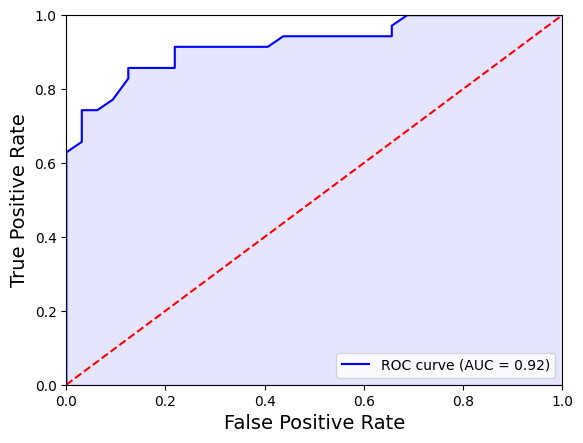

Text(0.5, 1.0, 'distribution of y_val')

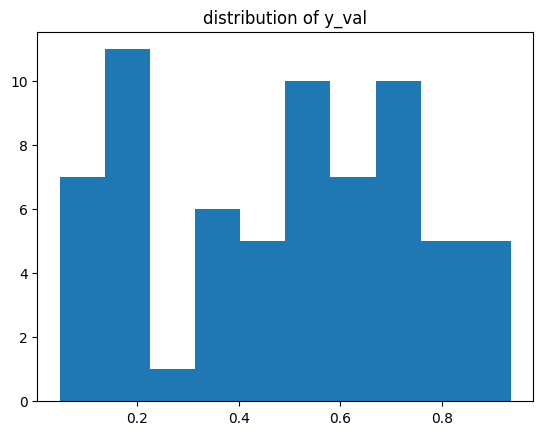

In [ ]:
#### Run Classifier with best parameters, on 20/80 split, and calculate AUC
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2020)
print(X.shape,y.shape,df_test.shape)

best_clf = ExtraTreesClassifier(n_estimators = 250, random_state=42)
best_clf.fit(X_train, y_train)

# calculate the fpr and tpr for all thresholds of the classification
probs = best_clf.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
auc = metrics.roc_auc_score(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)
print('AUC of ',auc , 'roc_auc',roc_auc)
# method I: plt
#plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'ROC curve (AUC = %0.2f)' % roc_auc, color='blue')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate',fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.fill_between(fpr, tpr, alpha=0.1, color='blue')
plt.show()


plt.hist(preds)
plt.title('distribution of y_val')

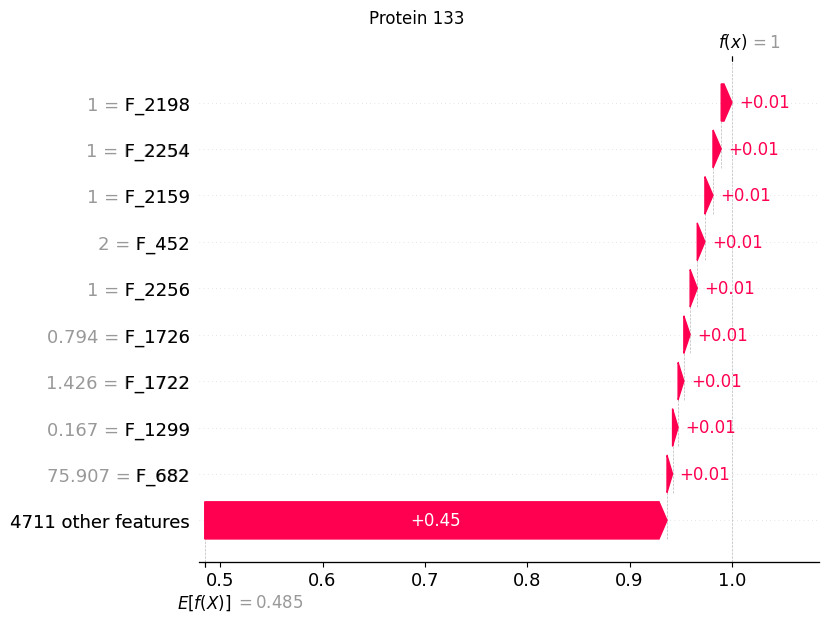

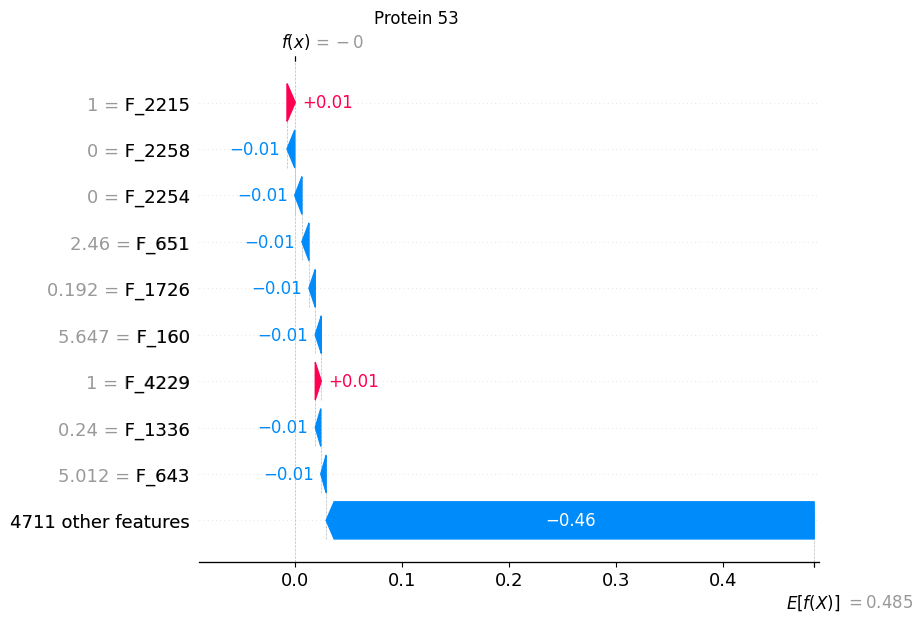

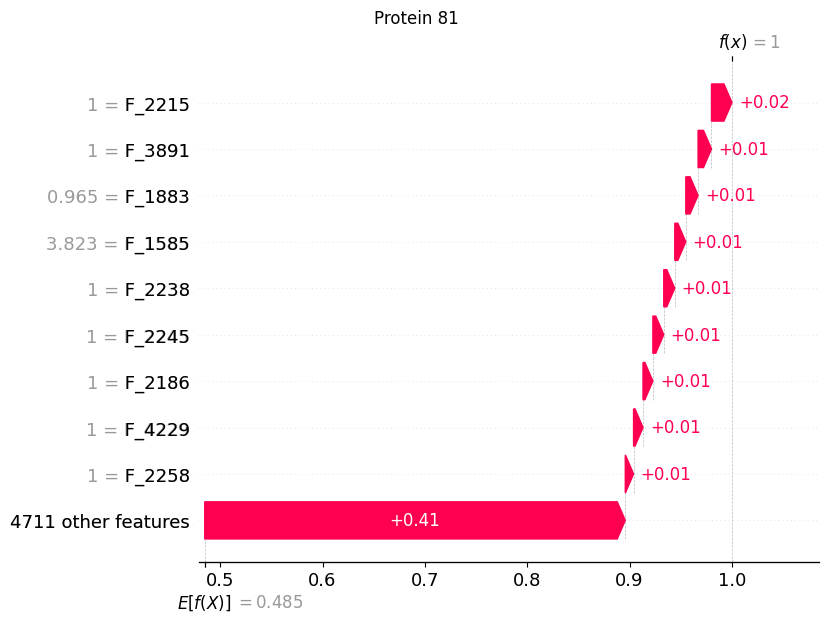

In [ ]:
best_clf = ExtraTreesClassifier(n_estimators = 250, random_state=42)
best_clf.fit(X, y)
explainer = shap.Explainer(best_clf)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[132,:,1], show=False)
plt.title('Protein 133', x=0.35)
plt.show()

shap.plots.waterfall(shap_values[52,:,1], show=False)
plt.title("Protein 53", x=0.35)
plt.show()

shap.plots.waterfall(shap_values[80,:,1], show=False)
plt.title("Protein 81", x=0.35)
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


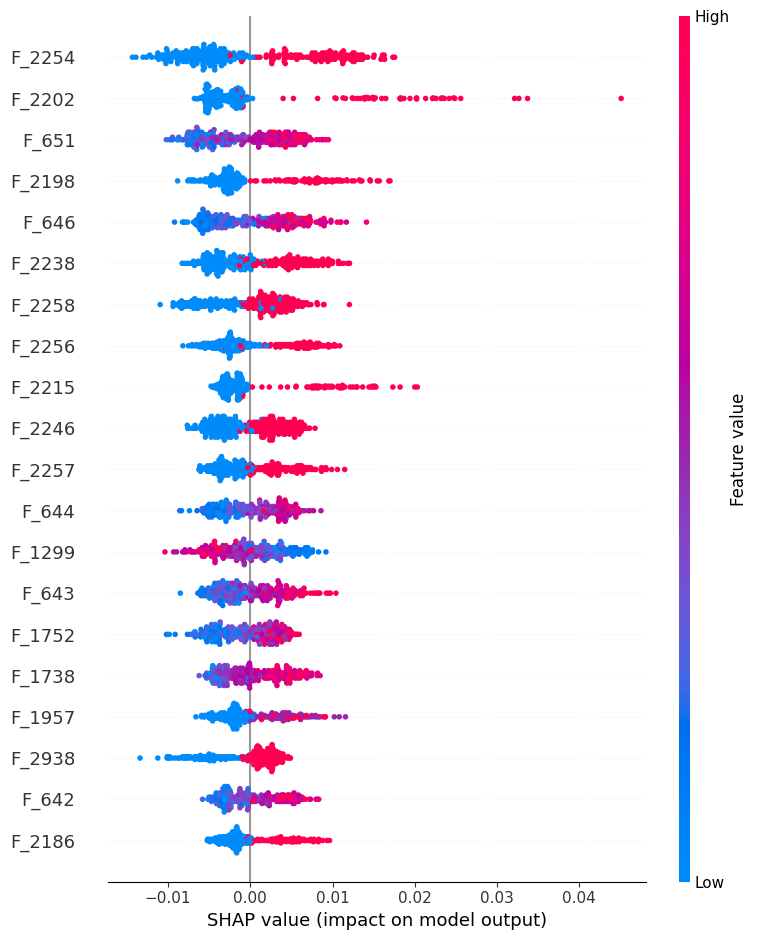

In [ ]:
### usingf SHAP TREE-EXPLAINER

# Create Explainer object that can calculate shap values
tree_explainer = shap.TreeExplainer(best_clf)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of X rather than a single row, to have more data for plot.
shap_values = tree_explainer.shap_values(X)

# Make plot. When plotting, we call shap_values[1]. For classification problems, there is a separate array of SHAP values for each possible outcome.
#In this case, we index in to get the SHAP values for the prediction of "True".
shap.summary_plot(shap_values[1], X)

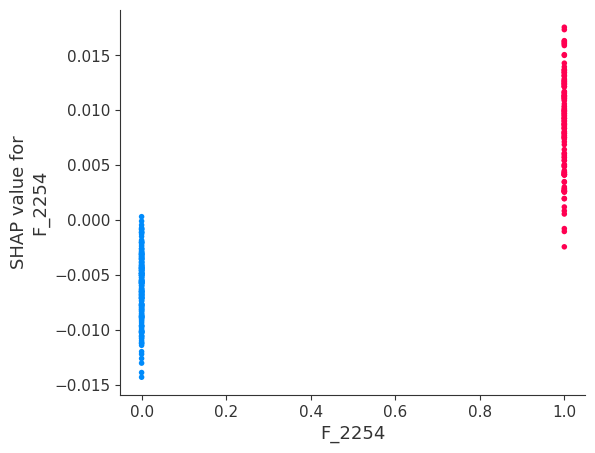

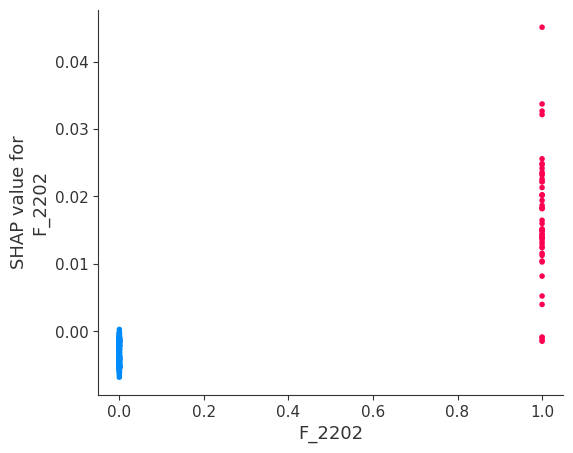

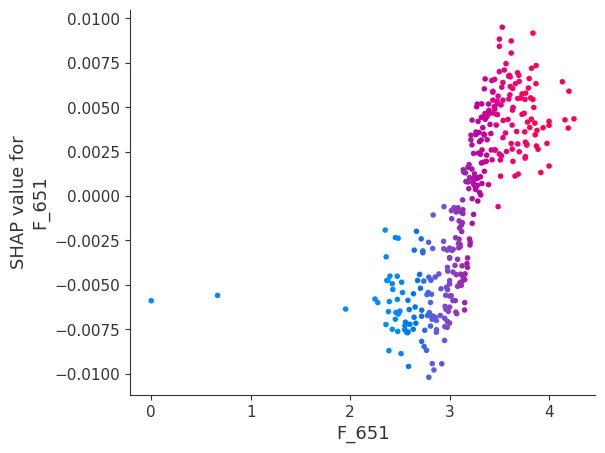

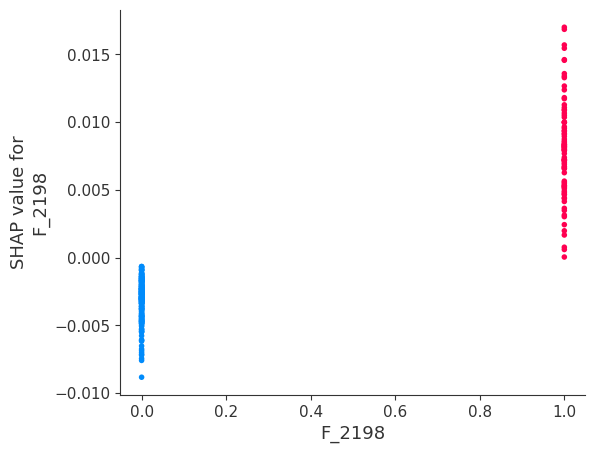

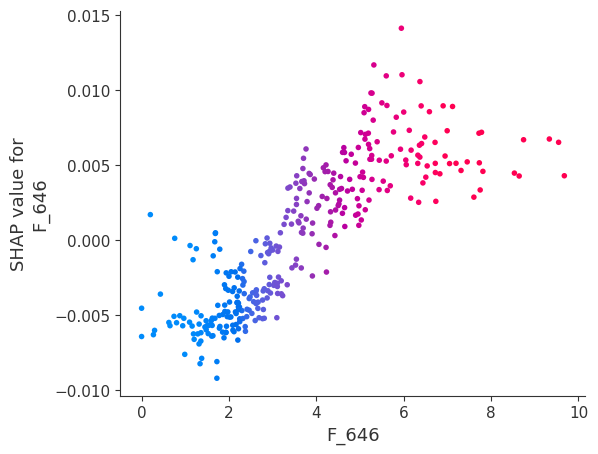

In [ ]:
top_5_features = ['F_2254','F_2202','F_651','F_2198','F_646']
shap.dependence_plot('F_2254', shap_values[1], X, interaction_index='F_2254')
shap.dependence_plot('F_2202', shap_values[1],X, interaction_index='F_2202')
shap.dependence_plot('F_651', shap_values[1],X, interaction_index='F_651')
shap.dependence_plot('F_2198', shap_values[1],X, interaction_index='F_2198')
shap.dependence_plot('F_646', shap_values[1],X, interaction_index='F_646')
